In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn import linear_model

In [8]:
import os

folder_path = r"D:\downloads\archive"
files = os.listdir(folder_path)
print(files)


['Taxi_Trips_-_2024_20240408.csv']


In [10]:
df = pd.read_csv(r"D:\downloads\archive\Taxi_Trips_-_2024_20240408.csv")
df.head()


,Trip ID,Taxi ID,Trip Start Timestamp,Trip End Timestamp,Trip Seconds,Trip Miles,Pickup Census Tract,Dropoff Census Tract,Pickup Community Area,Dropoff Community Area,...,Extras,Trip Total,Payment Type,Company,Pickup Centroid Latitude,Pickup Centroid Longitude,Pickup Centroid Location,Dropoff Centroid Latitude,Dropoff Centroid Longitude,Dropoff Centroid Location
0,0287f53fedcde6b0af9aab9e32cbd2cadb337eaa,e54db25f18193a08f1f5754515e8c338480e04fb938ed3...,03/01/2024 12:00:00 AM,03/01/2024 12:00:00 AM,15.0,0.09,NaN,NaN,8.0,8.0,...,35.0,38.75,Credit Card,City Service,41.899602,-87.633308,POINT (-87.6333080367 41.899602111),41.899602,-87.633308,POINT (-87.6333080367 41.899602111)
1,1f0034299b914fd7b45002568576a353c83acb2f,4a263f78f56815be4acd38658af8fc1824ce4e15f7ec81...,03/01/2024 12:00:00 AM,03/01/2024 12:15:00 AM,900.0,3.00,NaN,NaN,24.0,8.0,...,0.0,12.00,Cash,Taxi Affiliation Services,41.901207,-87.676356,POINT (-87.6763559892 41.9012069941),41.899602,-87.633308,POINT (-87.6333080367 41.899602111)
2,01a0b77b722a0b91f45cb4fc90b3e64f76fd0681,4f1e94982e6851725add382f7981d64006ae7c38f3664f...,03/01/2024 12:00:00 AM,03/01/2024 12:00:00 AM,711.0,5.84,NaN,NaN,56.0,NaN,...,5.0,26.70,Credit Card,City Service,41.792592,-87.769615,POINT (-87.7696154528 41.7925923603),NaN,NaN,NaN
3,14aff2071ac81c6450a8f8b0e1534497da900197,de8e8659ceb9eb0da842a46b60c0a5207098ac69fc23ab...,03/01/2024 12:00:00 AM,03/01/2024 12:30:00 AM,1770.0,13.36,NaN,NaN,76.0,3.0,...,4.0,47.10,Credit Card,Sun Taxi,41.980264,-87.913625,POINT (-87.913624596 41.9802643146),41.965812,-87.655879,POINT (-87.6558787862 41.96581197)
4,16d3a633e2f380cee4a7fa4677db163b6e91255d,d79d3e19a1d5f6cb0cd4449d5579412262a2f1b182799d...,03/01/2024 12:00:00 AM,03/01/2024 12:15:00 AM,849.0,6.13,NaN,NaN,8.0,3.0,...,0.0,22.82,Mobile,5 Star Taxi,41.899602,-87.633308,POINT (-87.6333080367 41.899602111),41.965812,-87.655879,POINT (-87.6558787862 41.96581197)


In [11]:
df = df[['Trip Miles', 'Pickup Community Area', 'Dropoff Community Area', 'Trip Total']]
df.head()

,Trip Miles,Pickup Community Area,Dropoff Community Area,Trip Total
0,0.09,8.0,8.0,38.75
1,3.00,24.0,8.0,12.00
2,5.84,56.0,NaN,26.70
3,13.36,76.0,3.0,47.10
4,6.13,8.0,3.0,22.82


In [12]:
df.shape

(865247, 4)

In [13]:
df.isnull().sum() 

Trip Miles                    6
Pickup Community Area     23195
Dropoff Community Area    83853
Trip Total                 2045
dtype: int64

In [14]:
df = df.dropna()

In [22]:
X = df[['Trip Miles', 'Pickup Community Area', 'Dropoff Community Area']]     #Input features
y = df['Trip Total']

In [23]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X, y,              # input and output data
    test_size=0.2,     # 20% for testing, 80% for training
    random_state=42    # for reproducibility
)

In [24]:
print("Size of training data: ",len(X_train), "\nSize of test split: ",len(X_test))

Size of training data:  619088 
Size of test split:  154773


In [25]:
from sklearn.linear_model import LinearRegression

In [26]:
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [27]:
model.predict([[4,24,8]])

D:\programfile\anaconda3\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([18.325704])

In [28]:
y_pred = model.predict(X_test)

In [31]:
print(y_pred[:4])        
print(y_test[:4].values)

[15.38331276 11.77694822 54.58785427 14.36457973]
[20.   12.75 58.2   7.25]


Text(0.5, 1.0, 'Actual vs Predicted Taxi Fare')

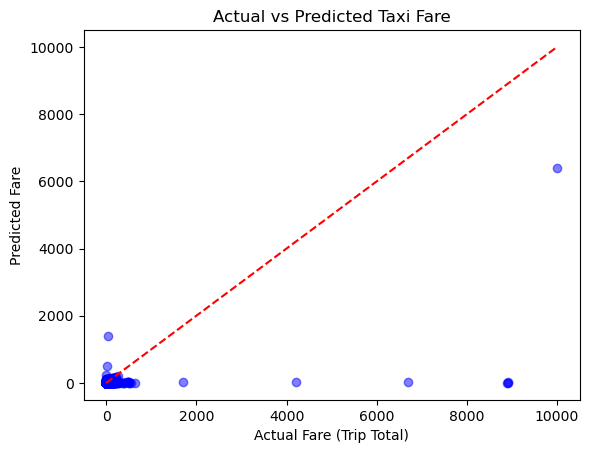

In [32]:
plt.scatter(y_test, y_pred, alpha=0.5, color='blue', label='Predicted vs Actual')

# Plot perfect prediction line
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color='red', linestyle='--', label='Perfect Prediction')

# Labels and title
plt.xlabel("Actual Fare (Trip Total)")
plt.ylabel("Predicted Fare")
plt.title("Actual vs Predicted Taxi Fare")

In [33]:
X = df[['Trip Miles', 'Pickup Community Area', 'Dropoff Community Area']]     #Input features
y = df['Trip Total']

In [34]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X, y,              # input and output data
    test_size=0.2,     # 20% for testing, 80% for training
    random_state=42    # for reproducibility
)

In [35]:
print("Size of training data: ",len(X_train), "\nSize of test split: ",len(X_test))

Size of training data:  619088 
Size of test split:  154773


In [36]:
from sklearn.linear_model import LinearRegression

In [37]:
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [38]:
model.predict([[4,24,8]])  # example: 4.0 miles, pickup area 24, dropoff area 8

D:\programfile\anaconda3\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([18.325704])

In [39]:
y_pred = model.predict(X_test)

In [40]:
print(y_pred[:5])        # First 5 predicted fare values
print(y_test[:5].values)

[15.38331276 11.77694822 54.58785427 14.36457973 11.99843956]
[20.   12.75 58.2   7.25  9.5 ]


In [54]:
dw= pd.read_csv(r'D:\downloads\person_data.csv')
dw.head()  

,Weight,Height,Age,Gender
0,79,1.80,35,Male
1,69,1.68,39,Male
2,73,1.82,25,Male
3,95,1.70,60,Male
4,82,1.87,27,Male


In [55]:
dw.shape

(10, 4)

In [56]:
X = dw[['Height','Age']]     #Input features
y = dw['Weight']

In [57]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y,              # input and output data
    test_size=0.2,     # 20% for testing, 80% for training
    random_state=42    # for reproducibility
)

In [58]:
print("Size of training data: ",len(X_train), "\nSize of test split: ",len(X_test))

Size of training data:  8 
Size of test split:  2


In [59]:
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [60]:
model.predict([[1.6,24]])

D:\programfile\anaconda3\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([58.77603])

In [61]:
y_pred = model.predict(X)

Text(0.5, 1.0, 'Height vs Weight')

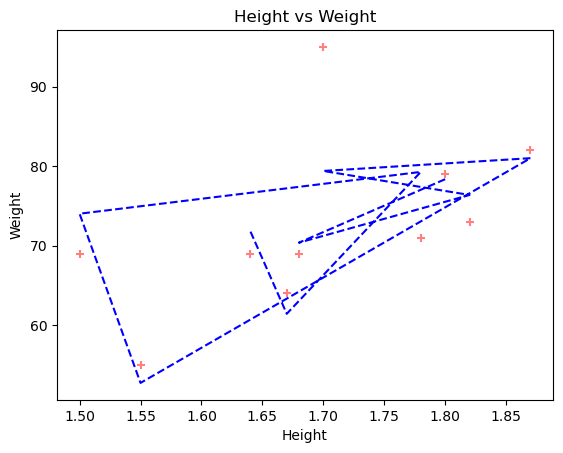

In [62]:
plt.scatter(dw['Height'],dw['Weight'], alpha=0.5, color='red', label='Predicted vs Actual',marker="+")

# Plot perfect prediction line
plt.plot(dw['Height'],y_pred, color='blue', linestyle='--')

# Labels and title
plt.xlabel("Height")
plt.ylabel("Weight")
plt.title("Height vs Weight")